In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
base = pd.read_csv('Eleicao.csv', sep=';')
base

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300
5,Susan Sanders,0,200
6,Anthony Harris,1,1800
7,Philip Richardson,1,1700
8,Eugene Phillips,0,300
9,Mildred Morris,1,1800


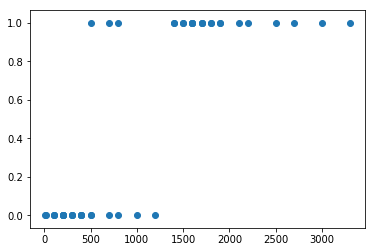

In [5]:
plt.scatter(base.DESPESAS, base.SITUACAO)

In [6]:
base.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [7]:
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [8]:
X = base.iloc[:, 2].values
print(X)

[  10  100 1600 1500 3300  200 1800 1700  300 1800  100  500 3000   20
  200  700 1600 1900  100  400 2700  200  300  500 2500 1400  700 1700
 1400 1600  400  200 1600 2200 1900  200 1200 1700 1500 2100  400  800
  400  500 1000  300  800]


In [9]:
X = X[:, np.newaxis]

In [10]:
y = base.iloc[:, 1].values
print(y)

[0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0
 1 1 1 0 0 0 1 0 0 1]


In [11]:
modelo = LogisticRegression()
modelo.fit(X, y)

/home/filipanselmo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
modelo.coef_# inclinação

array([[0.00298895]])

In [13]:
modelo.intercept_# intercept

array([-2.41847443])

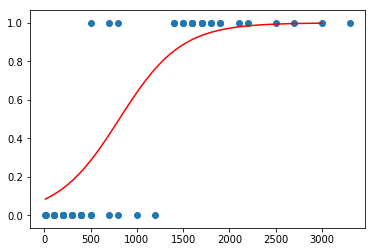

In [21]:
plt.scatter(X, y)
X_teste = np.linspace(10, 3000)

def model(x):
    return 1 / (1 + np.exp(-x))

r = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r, color='red')

In [23]:
base_previsoes = pd.read_csv('NovosCandidatos.csv', sep = ';')
base_previsoes

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [24]:
despesas = base_previsoes.iloc[:, 1].values
print(despesas)

[   0   10  200  500  900 1500 3000]


In [25]:
despesas = despesas.reshape(-1, 1)
print(despesas)

[[   0]
 [  10]
 [ 200]
 [ 500]
 [ 900]
 [1500]
 [3000]]


In [28]:
previsoes_teste = modelo.predict(despesas)
print(previsoes_teste)

[0 0 0 0 1 1 1]


In [30]:
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base_previsoes

array([['A', 0, 0, 0],
       ['B', 10, 0, 0],
       ['C', 200, 0, 0],
       ['D', 500, 0, 0],
       ['E', 900, 1, 1],
       ['F', 1500, 1, 1],
       ['G', 3000, 1, 1]], dtype=object)

In [31]:
a = [15, 18, 20, 25, 30, 44]
print(a)
b = [240, 255, 270, 283, 300, 310]
print(b)

[15, 18, 20, 25, 30, 44]
[240, 255, 270, 283, 300, 310]


In [32]:
correlacao = np.corrcoef(a, b) #função para ver a correlação
#entre duas variaveis
print(correlacao)

[[1.         0.92378059]
 [0.92378059 1.        ]]
